In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import random
import seaborn as sns
import os

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_reunion.csv"))
average_rain = pd.read_csv(os.path.join(folder_path, "average_reunion.csv"))

In [4]:
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

In [5]:
print(average_rain)

            Date  Precipitation
0     2000-06-01       0.000000
1     2000-06-02       0.000000
2     2000-06-03       0.000000
3     2000-06-04       1.054254
4     2000-06-05       6.222801
...          ...            ...
8357  2023-04-26      18.338750
8358  2023-04-27       2.246250
8359  2023-04-28       5.416250
8360  2023-04-29       1.327500
8361  2023-04-30       0.000000

[8362 rows x 2 columns]


/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_84645/786229658.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_frame = new_frame.append(rolling_rain[(rolling_rain['Decimal'] > i) & (rolling_rain['Decimal'] <= i+.3)])
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_84645/786229658.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_frame = new_frame.append(rolling_rain[(rolling_rain['Decimal'] > i) & (rolling_rain['Decimal'] <= i+.3)])
/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_84645/786229658.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_frame = new_frame.append(rolling_rain[(rolling_rain['Decimal'] > i) & (rolling_rain['Decimal'] <= i+.3)])
/var/folders/d0/48h

([<matplotlib.axis.YTick at 0x7fb36c48a730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

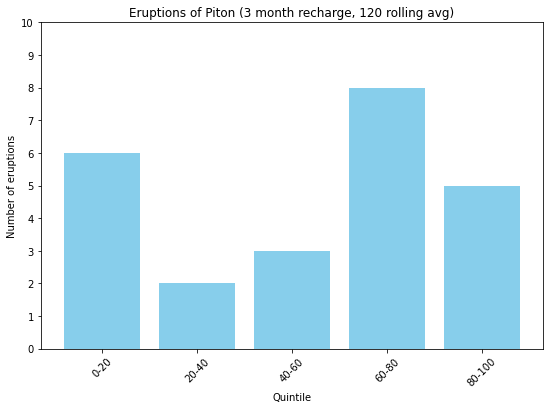

In [16]:
# Make a histogram for Fernandina
#volcanos = {'Fernandina': 'Fe', 'Azul, Cerro': 'CA', 'Negra, Sierra': 'SN', 'Wolf': 'Wo', 'Marchena': 'Ma', 'Alcedo': 'Al'}
volcanos = {'Fournaise, Piton de la': 'PF'}
erupt_dates = eruptions['Start']
#erupt_dates = eruptions['Start'][(eruptions['Start'] >= '1968-06-01') & (eruptions['Volcano'] == 'Fernandina')]
rolling_rain = average_rain.copy()
rain_start = '11-01'
rain_end = '10-31'
#rolling_rain['Precipitation'] = rolling_rain['Precipitation'].apply(lambda x: max(x-1, 0))
#rolling_rain['Precipitation'] = rolling_rain['Precipitation'].apply(lambda x: min(x, 50))
rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()
rolling_rain['roll90'] = rolling_rain['roll90'].shift(30)
rolling_rain = rolling_rain.dropna()
rolling_rain['Decimal'] = rolling_rain['Date'].apply(date_to_decimal_year)
decimal_erupts = np.array(erupt_dates.apply(date_to_decimal_year))
erupt_dates = np.array(erupt_dates)
new_frame = pd.DataFrame()
for i in decimal_erupts:
    new_frame = new_frame.append(rolling_rain[(rolling_rain['Decimal'] > i) & (rolling_rain['Decimal'] <= i+.3)])
removals = list(new_frame['Date'])
rolling_rain = rolling_rain[~rolling_rain['Date'].isin(removals)]
rolling_rain = rolling_rain.sort_values(by='roll90')
value = int(len(rolling_rain) * .2)



plt.figure(figsize=(9,6))

categories = ['0-20', '20-40', '40-60', '60-80', '80-100']
values = [0,0,0,0,0]
top_twenty = []

for k in erupt_dates:
    for i in range(5):
        period = np.array(rolling_rain['Date'][value*i:value*(i+1)])
        if k in period:
            values[i] += 1
            break
                  
        
plt.bar(categories, values, color='skyblue')
plt.xlabel("Quintile")
plt.ylabel("Number of eruptions")
plt.title("Eruptions of Piton (3 month recharge, 120 rolling avg)")
plt.xticks(rotation=45) 
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])